### Trabalhar com previsões de vendas de uma loja.
- Tratar os dados
- Formatar (se necessário)
- Treinar modelo
- prever a venda de dezembro
- Motnar um histograma dos dados
- Montar um plot de scatter

In [30]:
# Bibliotecas usadas
import pandas as pd
import matplotlib as plt
import seaborn as sns
# importar bibliotecas do sklearrn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700,2800, 2900, 3000, 3100, 3200, 3300]
    }

In [32]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [33]:
# Mapear meses para números
meses_map = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3,
    'Abril': 4, 'Maio': 5, 'Junho': 6,
    'Julho': 7, 'Agosto': 8, 'Setembro': 9,
    'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}
df_vendas['mes_num'] = df_vendas['mes'].map(meses_map)

In [34]:
df_vendas.drop('mes', axis=1, inplace=True)
df_vendas

,vendas,mes_num
0,2000,1
1,2200,2
2,2300,3
3,2500,4
4,2600,5
5,2700,6
6,2800,7
7,2900,8
8,3000,9
9,3100,10


In [35]:
# Correlação do DataFrame
df_vendas.corr(method='pearson')

,vendas,mes_num
vendas,1.000000,0.994214
mes_num,0.994214,1.000000


In [36]:
# Correlação entre 2 variáveis
df_vendas.vendas.corr(df_vendas.mes_num)

np.float64(0.9942143462051067)

<Axes: >

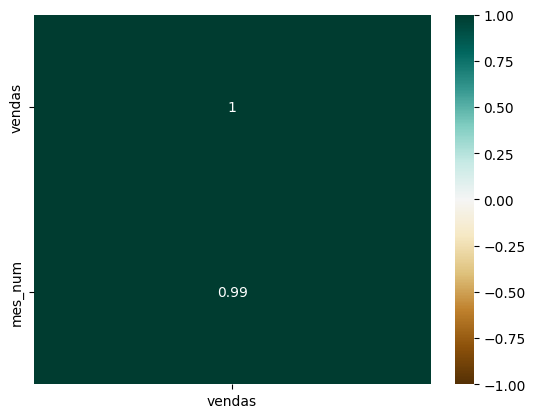

In [37]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_vendas.corr()[['vendas']], vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: xlabel='mes_num', ylabel='vendas'>

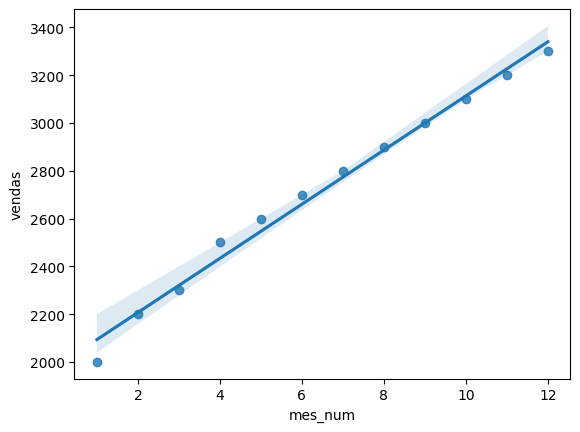

In [38]:
sns.regplot(data=df_vendas, x='mes_num', y='vendas')

In [40]:
# Criar modelo
x = df_vendas[['mes_num']]
y = df_vendas['vendas']

# Dividir conjunto entre treino e teste
X_train, X_test, Y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=51)

# Treinar o algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, Y_train)

# Gerar predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)

In [42]:
model_1.coef_

array([114.16666667])

In [43]:
model_1.intercept_

np.float64(1963.3333333333333)

In [44]:
# R2 Score - Conjunto de Treinamento
model_1.score(X_train,Y_train)

0.990709949854843

In [46]:
# R2 Score
r2_score(y_test, y_pred)

0.9631440781440782

In [47]:
# MAE (Mean absolut error)
mean_absolute_error(y_test, y_pred)

36.66666666666663